# 2024/04/04 Draw Module Demo
_Author: Izaac Molina_

## Goal and Purpose
The traditional way to design a model in epymorph is to first draw a ipm model, then translate that model into an ipm object via code. This project seeks to go in the other direction: turning an ipm object into a model. This is great both for educational and debugging purposes as it allows users to present their model more clearly as well as check to ensure they have implemented the model correctly in epymorph

## Prereqs
A LaTeX interpretter for generating edge labels, such as [MikTeX]( https://miktex.org/download) or [TexLive](https://tug.org/texlive/)

[Graphviz](https://graphviz.org/download/) for translating the IPM into a visualization


## Design
The `draw` module uses GraphViz, a software that when combined with a Python Library can be used to convert the ipm into a graph object, which can then be printed as a .png.

The primary method in `draw` is the `render` method, which takes in an ipm `CompartmentModel` object and draws the resulting visualization in jupyter notebook. This also can optionally display to console with the `console` flag.

A similar method, `render_and_save` performs the same operations as render, and additionally saves the model as a png in a given file directory.

render(ipm: CompartmentModel, console: bool)

## Draw applied to ipms in the epymorph system:

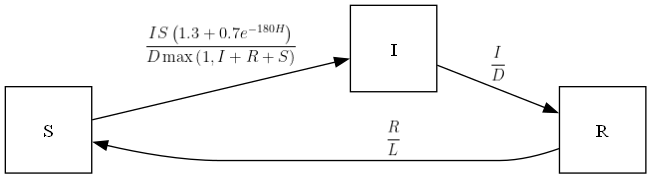

In [1]:
from epymorph import ipm_library, render, render_and_save

ipm = ipm_library['pei']()


render(ipm)

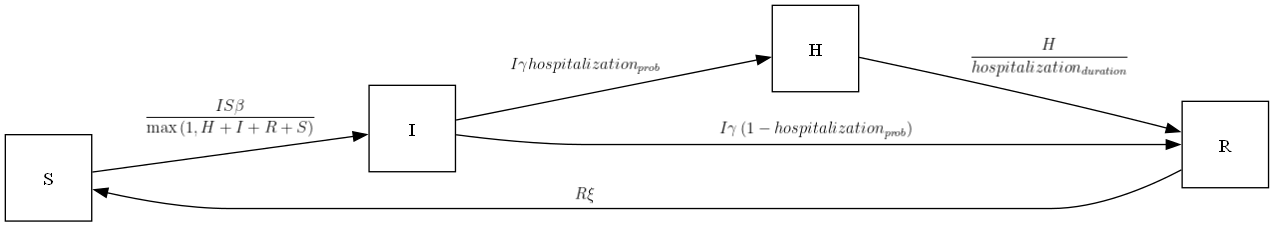

Model saved successfully at scratch\sirh


In [3]:
ipm = ipm_library['sirh']()

# Assuming you have a "scratch" directory in the main Epymorph directory
# If not saving, provide an absolute file path
render_and_save(ipm, r"scratch\sirh")

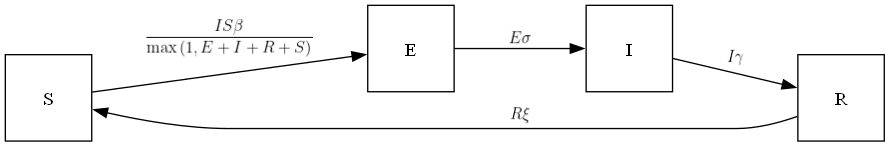

Model saved successfully at scratch\seirs


In [4]:
ipm = ipm_library['seirs']()

# Assuming you have a "scratch" directory in the main Epymorph directory
# If not saving, provide an absolute file path
render_and_save(ipm, r"scratch\seirs")

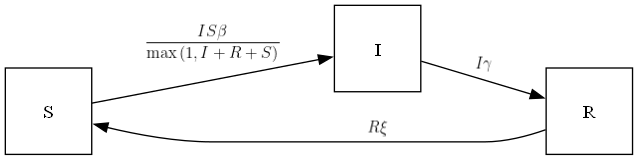

In [5]:
ipm = ipm_library['sirs']()

render(ipm)

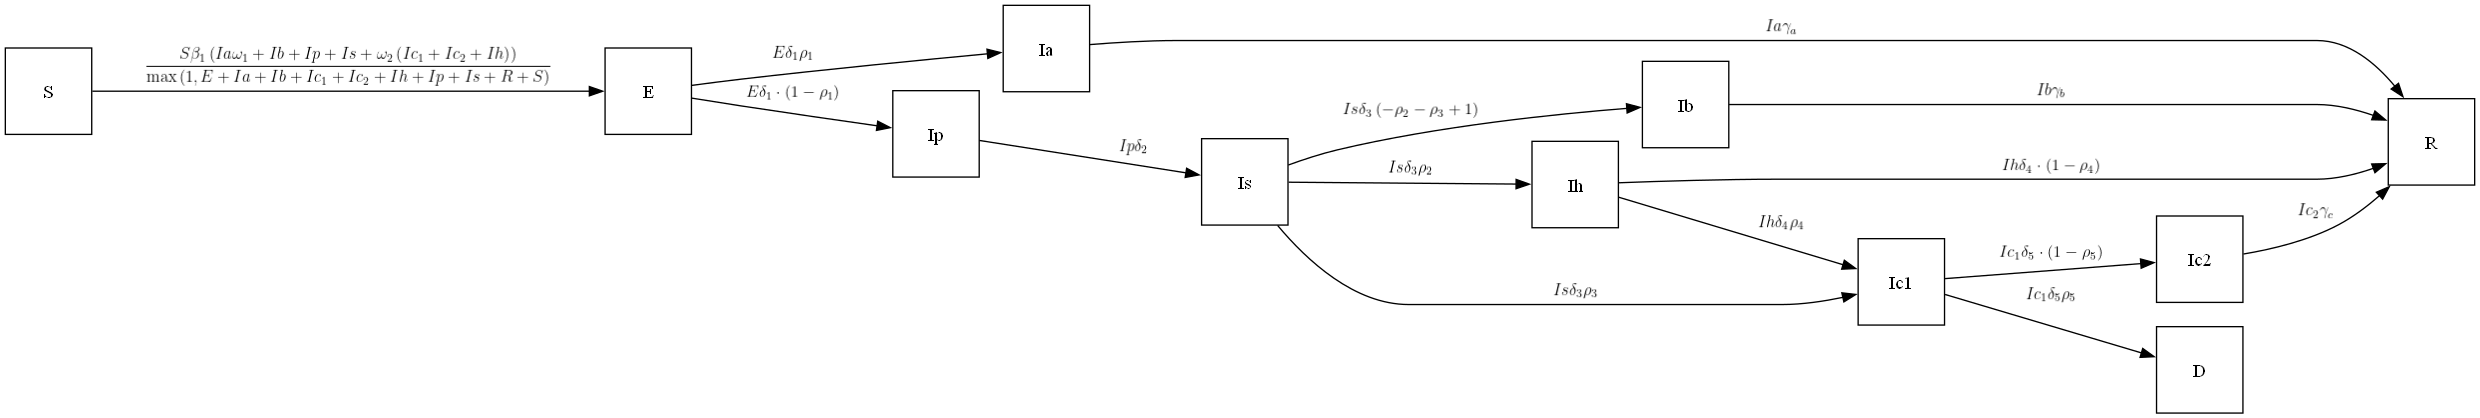

In [6]:
ipm = ipm_library['sparsemod']()

render(ipm)

## The LaTeX conversion in `draw` auto truncates overly long constant values

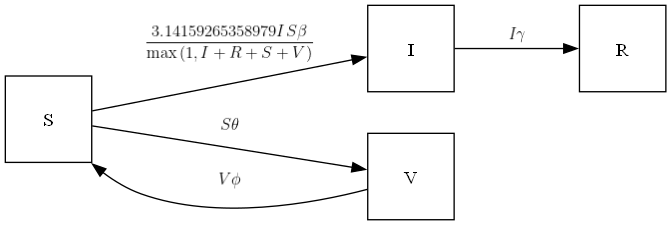

In [7]:
from sympy import Max

from epymorph import *
from epymorph.compartment_model import *


def construct_ipm():
    symbols = create_symbols(
        compartments=[
            compartment('S'),
            compartment('I'),
            compartment('R'),
            compartment('V'),
        ],
        attributes=[
            param('beta', shape=Shapes.TxN),
            param('gamma', shape=Shapes.TxN),
            param('theta', shape=Shapes.TxN),
            # add a parameter to simulate the rate at which vaccinated become susceptible
            param('phi', shape=Shapes.TxN),
        ])

    [S, I, R, V] = symbols.compartment_symbols
    [β, γ, θ, φ] = symbols.attribute_symbols

    # formulate N so as to avoid dividing by zero;
    # this is safe in this instance because if the denominator is zero,
    # the numerator must also be zero
    N = Max(1, S + I + R + V)

    return create_model(
        symbols=symbols,
        transitions=[
            edge(S, I, rate=3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117067982148086513282306647093844609550582231725359408128481117450284102701938521105559644622948954930381964428810975665933446128475648233786783165271201909145648566923460348610454326648213393607260249141273724587006606315588174881520920962829254091715364367892590360011330530548820466521384146951941511609433057270365759591953092186117381932611793105118548074462379962749567351885752724891227938183011949129833673362440656643086021394946395224737190702179860943702770539217176293176752384674818467669405132000568127145263560827785771342757789609173637178721468440901224953430146549585371050792279689258923542019956112129021960864034418159813629774771309960518707211349999998372978049951059731732816096318595024459455346908302642522308253344685035261931188171010003137838752886587533208381420617177669147303598253490428755468731159562863882353787593751957781857780532171226806613001927876611195909216420198938095257201065485863278865936153381827968230301952035301852968995773622599413891249721775283479131515574857242454150695950829533116861727855889075098381754637464939319255060400927701671139009848824012858361603563707660104710181942955596198946767837449448255379774726847104047534646208046684259069491293313677028989152104752162056966024058038150193511253382430035587640247496473263914199272604269922796782354781636009341721641219924586315030286182974555706749838505494588586926995690927210797509302955321165344987202755960236480665499119881834797753566369807426542527862551818417574672890977772793800081647060016145249192173217214772350141441973568548161361157352552133475741849468438523323907394143334547762416862518983569485562099219222184272550254256887671790494601653466804988627232791786085784383827967976681454100953883786360950680064225125205117392984896084128488626945604241965285022210661186306744278622039194945047123713786960956364371917287467764657573962413890865832645995813390478027590099465764078951269468398352595709825822620522489407726719478268482601476990902640136394437455305068203496252451749399651431429809190659250937221696461515709858387410597885959772975498930161753928468138268683868942774155991855925245953959431049972524680845987273644695848653836736222626099124608051243884390451244136549762780797715691435997700129616089441694868555848406353422072225828488648158456028506016842739452267467678895252138522549954666727823986456596116354886230577456498035593634568174324112515076069479451096596094025228879710893145669136867228748940560101503308617928680920874760917824938589009714909675985261365549781893129784821682998948722658804857564014270477555132379641451523746234364542858444795265867821051141354735739523113427166102135969536231442952484937187110145765403590279934403742007310578539062198387447808478489683321445713868751943506430218453191048481005370614680674919278191197939952061419663428754440643745123718192179998391015919561814675142691239748940907186494231961567945208095146550225231603881930142093762137855956638937787083039069792077346722182562599661501421503068038447734549202605414665925201497442850732518666002132434088190710486331734649651453905796268561005508106658796998163574736384052571459102897064140110971206280439039759515677157700420337869936007230558763176359421873125147120532928191826186125867321579198414848829164470609575270695722091756711672291098169091528017350671274858322287183520935396572512108357915136988209144421006751033467110314126711136990865851639831501970165151168517143765761835155650884909989859982387345528331635507647918535893226185489632132933089857064204675259070915481416549859461637180270981994309924488957571282890592323326097299712084433573265489382391193259746366730583604142813883032038249037589852437441702913276561809377344403070746921120191302033038019762110110044929321516084244485963766983895228684783123552658213144957685726243344189303968642624341077322697802807318915441101044682325271620105265227211166039666557309254711055785376346682065310989652691862056476931257058635662018558100729360659876486117910453348850346113657686753249441668039626579787718556084552965412665408530614344431858676975145661406800700237877659134401712749470420562230538994561314071127000407854733269939081454664645880797270826683063432858785698305235808933065757406795457163775254202114955761581400250126228594130216471550979259230990796547376125517656751357517829666454779174501129961489030463994713296210734043751895735961458901938971311179042978285647503203198691514028708085990480109412147221317947647772622414254854540332157185306142288137585043063321751829798662237172159160771669254748738986654949450114654062843366393790039769265672146385306736096571209180763832716641627488880078692560290228472104031721186082041900042296617119637792133757511495950156604963186294726547364252308177036751590673502350728354056704038674351362222477158915049530984448933309634087807693259939780541934144737744184263129860809988868741326047215695162396586457302163159819319516735381297416772947867242292465436680098067692823828068996400482435403701416314965897940924323789690706977942236250822168895738379862300159377647165122893578601588161755782973523344604281512627203734314653197777416031990665541876397929334419521541341899485444734567383162499341913181480927777103863877343177207545654532207770921201905166096280490926360197598828161332316663652861932668633606273567630354477628035045077723554710585954870279081435624014517180624643626794561275318134078330336254232783944975382437205835311477119926063813346776879695970309833913077109870408591337464144282277263465947047458784778720192771528073176790770715721344473060570073349243693113835049316312840425121925651798069411352801314701304781643788518529092854520116583934196562134914341595625865865570552690496520985803385072242648293972858478316305777756068887644624824685792603953527734803048029005876075825104747091643961362676044925627420420832085661190625454337213153595845068772460290161876679524061634252257719542916299193064553779914037340432875262888963995879475729174642635745525407909145135711136941091193932519107602082520261879853188770584297259167781314969900901921169717372784768472686084900337702424291651300500516832336435038951702989392233451722013812806965011784408745196012122859937162313017114448464090389064495444006198690754851602632750529834918740786680881833851022833450850486082503930213321971551843063545500766828294930413776552793975175461395398468339363830474611996653858153842056853386218672523340283087112328278921250771262946322956398989893582116745627010218356462201349671518819097303811980049734072396103685406643193950979019069963955245300545058068550195673022921913933918568034490398205955100226353536192041994745538593810234395544959778377902374216172711172364343543947822181852862408514006660443325888569867054315470696574745855033232334210730154594051655379068662733379958511562578432298827372319898757141595781119635833005940873068121602 * β * S * I / N),
            edge(I, R, rate=γ * I),
            edge(S, V, rate=θ * S),
            edge(V, S, rate=φ * V),
        ]
    )


debug_ipm = construct_ipm()

render(debug_ipm)

## Edges will extend along with attribute names

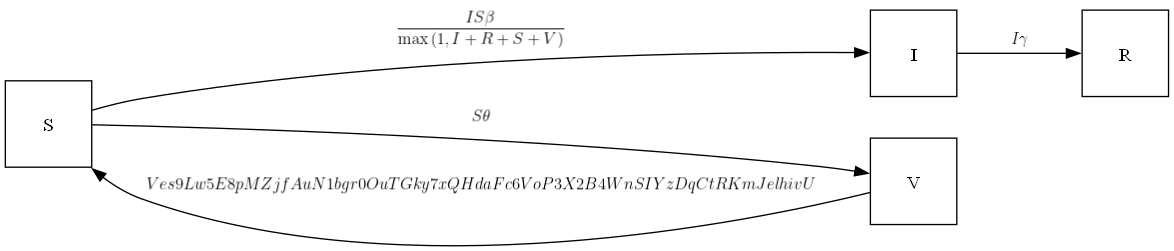

In [9]:
from sympy import Max

from epymorph import *
from epymorph.compartment_model import *


def construct_ipm():
    symbols = create_symbols(
        compartments=[
            compartment('S'),
            compartment('I'),
            compartment('R'),
            compartment('V'),
        ],
        attributes=[
            param('beta', shape=Shapes.TxN),
            param('gamma', shape=Shapes.TxN),
            param('theta', shape=Shapes.TxN),
            param('es9Lw5E8pMZjfAuN1bgr0OuTGky7xQHdaFc6VoP3X2B4WnSIYzDqCtRKmJelhivU',
                  shape=Shapes.TxN)
        ])

    [S, I, R, V] = symbols.compartment_symbols
    [β, γ, θ, lorem] = symbols.attribute_symbols

    # formulate N so as to avoid dividing by zero;
    # this is safe in this instance because if the denominator is zero,
    # the numerator must also be zero
    N = Max(1, S + I + R + V)

    return create_model(
        symbols=symbols,
        transitions=[
            edge(S, I, rate=β * S * I / N),
            edge(I, R, rate=γ * I),
            edge(S, V, rate=θ * S),
            edge(V, S, rate=lorem * V),
        ]
    )


debug_ipm = construct_ipm()

render(debug_ipm)

## Repeat edges are summed in the label

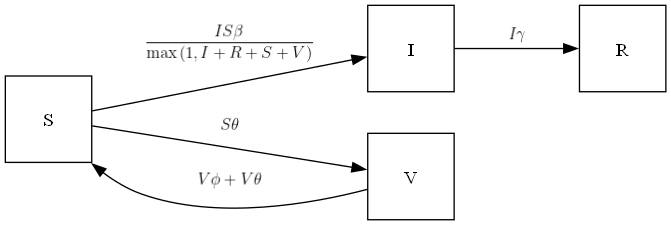

In [10]:
from sympy import Max

from epymorph import *
from epymorph.compartment_model import *


def construct_ipm():
    symbols = create_symbols(
        compartments=[
            compartment('S'),
            compartment('I'),
            compartment('R'),
            compartment('V'),
        ],
        attributes=[
            param('beta', shape=Shapes.TxN),
            param('gamma', shape=Shapes.TxN),
            param('theta', shape=Shapes.TxN),
            param('phi', shape=Shapes.TxN)
        ])

    [S, I, R, V] = symbols.compartment_symbols
    [β, γ, θ, φ] = symbols.attribute_symbols

    # formulate N so as to avoid dividing by zero;
    # this is safe in this instance because if the denominator is zero,
    # the numerator must also be zero
    N = Max(1, S + I + R + V)

    return create_model(
        symbols=symbols,
        transitions=[
            edge(S, I, rate=β * S * I / N),
            edge(I, R, rate=γ * I),
            edge(S, V, rate=θ * S),
            edge(V, S, rate=φ * V),
            edge(V, S, rate=θ * V)  # notice the repeat edge
        ]
    )


debug_ipm = construct_ipm()

render(debug_ipm)